In [2]:
%pylab inline
from skimage import data, color, transform, morphology
from scipy.fftpack import dct,idct
from scipy.signal import gaussian, convolve2d

Populating the interactive namespace from numpy and matplotlib


# Transformata Fouriera w obrazach

Zobaczmy jak to działa na kilku przykładach. Wiadomo, że transformata Fouriera 1D dobrze rozpoznaje sygnał sinusoidalny (jako pojedyńcy punkt na spektrogramie). Zobaczmy czy tak samo będzie z tranformatą 2D. Wygnereuj taki sygnał i narysuj jego widmo amplitudowe i fazowe:

\begin{equation}
I_{x,y}=A\cdot\sin(2\cdot\pi\cdot f\cdot x/W+\phi)\hspace{1cm}\text{, dla }x\in[0,W-1]\text{ i }y\in[0,H-1]
\end{equation}

Możesz najpierw założyć jednostkową amplitudę i zerową fazę oraz $f$ ustawić na 100, a póżniej zobaczyć co się stanie jak zmienisz parametry. Załóż że W i H są 512 pikseli. Zaleca się użycia polecenia *numpy.meshgrid* do wygenerowania wartości współrzędnych X i Y z powyższego wzoru (najlepiej jako liczby rzeczywiste).

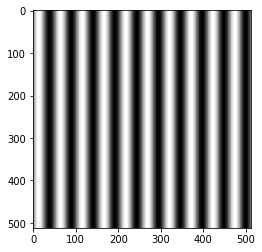

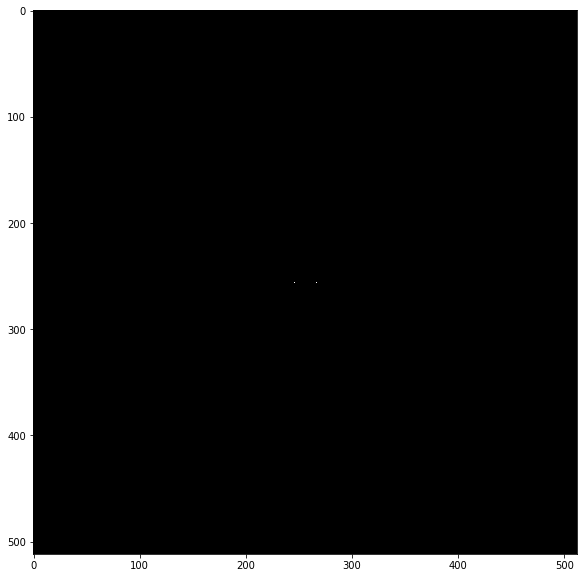

In [40]:
W=H=512
x,y=meshgrid(arange(W),arange(H))
A=1
f=10
ph=0
I=A*sin(2*pi*f*x/W+ph)

imshow(I,cmap=cm.gray)

figure(figsize=(10,10))

H=np.fft.fft2(I)
H=fft.fftshift(H)

imshow(abs(H),cmap=cm.gray)

A teraz zrób to samo ale dla $y$ zamiast $x$:

\begin{equation}
I_{x,y}=A\cdot\sin(2\cdot\pi\cdot f\cdot y/H+\phi)\hspace{1cm}\text{, dla }x\in[0,W-1]\text{ i }y\in[0,H-1]
\end{equation}

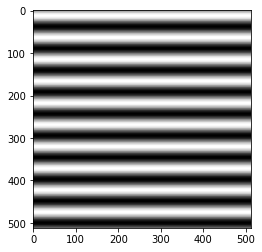

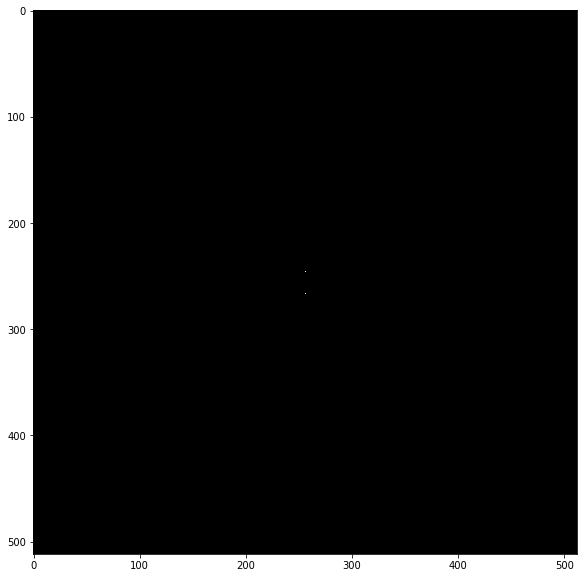

In [41]:
W=H=512
x,y=meshgrid(arange(W),arange(H))
A=1
f=10
ph=0
I=A*sin(2*pi*f*y/H+ph)

imshow(I,cmap=cm.gray)

figure(figsize=(10,10))

H=np.fft.fft2(I)
H=fft.fftshift(H)

imshow(abs(H),cmap=cm.gray)

Teraz zrób to samo dla sumy $x$ i $y$:

\begin{equation}
I_{x,y}=A\cdot \sin(2\cdot\pi\cdot f\frac{x/W+y/H}{2}+\phi)\hspace{1cm}\text{, dla }x\in[0,W]\text{ i }y\in[0,H]
\end{equation}

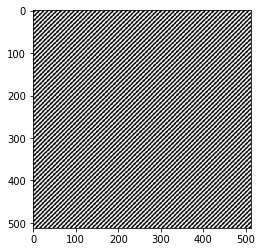

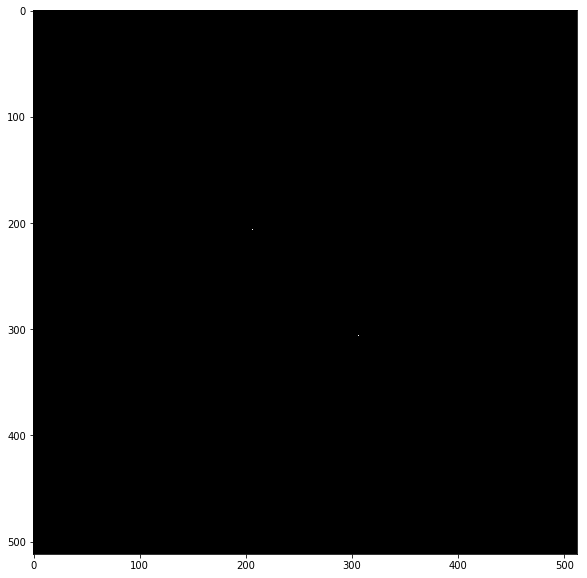

In [46]:
W=H=512.0
x,y=meshgrid(arange(W),arange(H))
A=1
f=100
ph=0
I=A*cos(2*pi*f*(x/W+y/H)/2+ph)

imshow(I,cmap=cm.gray)

figure(figsize=(10,10))

H=np.fft.fft2(I)
H=fft.fftshift(H)

imshow(abs(H),cmap=cm.gray)

Spróbuj zdefniować obszar wartości widma 2D i określić co w nim oznaczają poszczególne punkty. Jaka występuje symetria?

Zrób przykładowe widmo jakiegoś obrazu i dokonaj odwrotnej transformaty Fouriera.

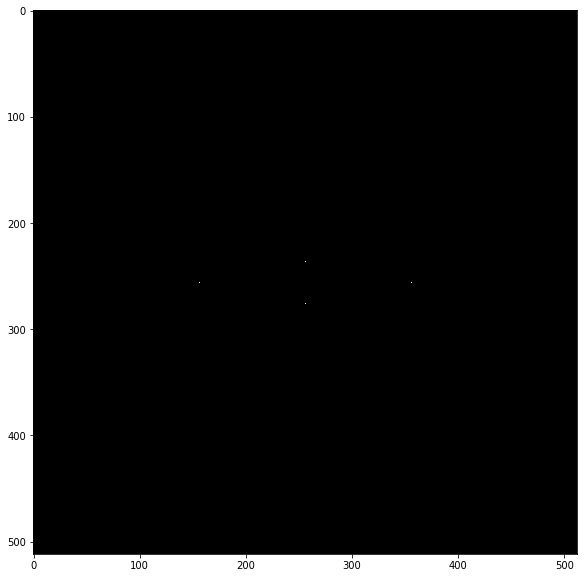

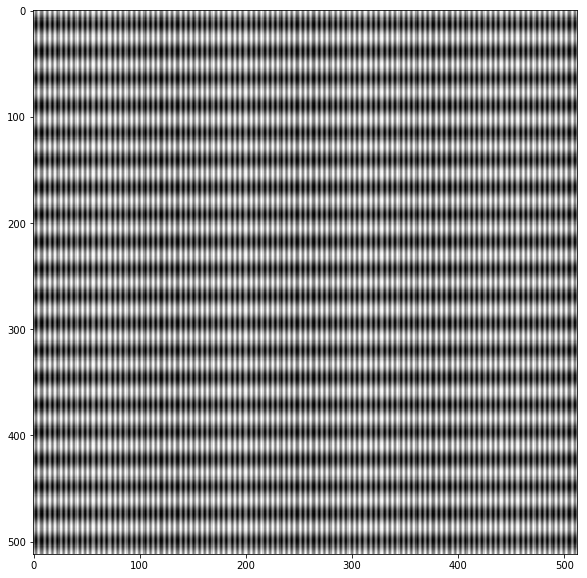

In [64]:
H=zeros((512,512))

H[276,256]=1e10
H[236,256]=1e10
H[256,356]=1e10
H[256,156]=1e10

figure(figsize=(10,10))
imshow(H,cmap=cm.gray)

H=fft.fftshift(H)
I=fft.ifft2(H)
I=real(I)

figure(figsize=(10,10))
imshow(I,cmap=cm.gray)

Wczytaj przykładowy obraz natuarlny i narysuj jego widmo. Zauważ, że taki obraz może mieć dosyć duże przesunięcie DC, więc jego składowa widma $(0,0)$ będzie bardzo wysoka. Najlepiej obejrzeć widmo w skali logarytmicznej.

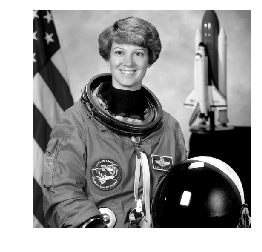

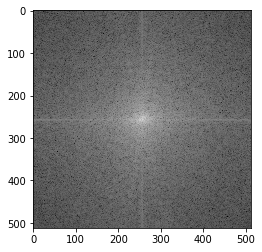

In [77]:
i=data.astronaut()
i=color.rgb2gray(i)

imshow(i,cmap=cm.gray)
_=axis('off')


I=fft.fft2(i)
I=fft.fftshift(I)

figure()
imshow(log(abs(I)),cmap=cm.gray)

Dokonaj zmian w widmie maskując jego poszczególne części: najpierw górne, potem dolne częstotliwości i narysuj co z tego wyjdzie.

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


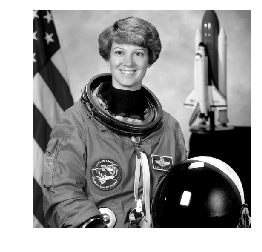

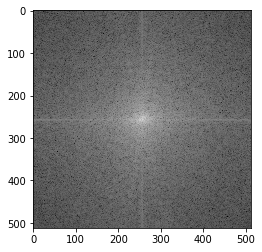

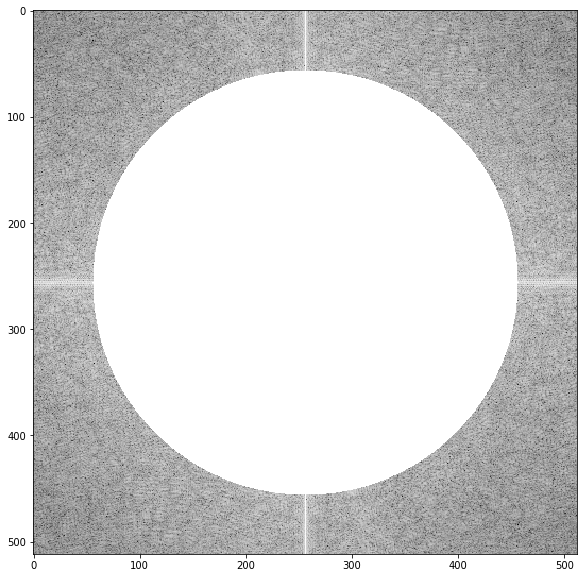

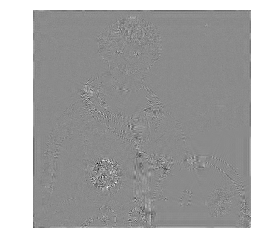

In [76]:
i=data.astronaut()
i=color.rgb2gray(i)

imshow(i,cmap=cm.gray)
_=axis('off')

I=fft.fft2(i)
I=fft.fftshift(I)

figure()
imshow(log(abs(I)),cmap=cm.gray)

L=200

d=morphology.disk(L)
m=zeros(I.shape)
M=int(I.shape[0]/2)
m[M-L:M+L+1,M-L:M+L+1]=d

m=1-m
I=I*m

figure(figsize=(10,10))
imshow(log(abs(I)),cmap=cm.gray)

I=fft.fftshift(I)
i=fft.ifft2(I)
i=real(i)

figure()
imshow(i,cmap=cm.gray)
_=axis('off')


# Dyskretrna transformata kosinusowa

Narysuj wynik DCT na przykładowym obrazie naturalnym. Ponieważ *numpy* nie ma implementacji DCT, do jej policzenia użyj metody *scipy.fftpack.dct*. Metoda ta niestety liczy tylko 1D wersję transformaty, ale możemty zastosować pewną zależność transfotmaty żeby otrzymać poprawną wersję 2D:

  * policz DCT z obrazu
  * dokonaj transpozycji wyniku
  * policz DCT z powyższej transpozycji
  * dokonaj jeszcze jednej transpozycji wyniku

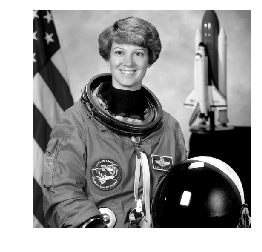

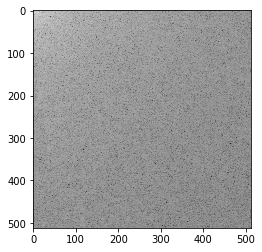

In [80]:
i=data.astronaut()
i=color.rgb2gray(i)

imshow(i,cmap=cm.gray)
_=axis('off')

# I=dct(i)
# I=I.T
# I=dct(I)
# I=I.T

I=dct(dct(i).T).T

figure()
imshow(log(abs(I)),cmap=cm.gray)

Użyj DCT do dokonania tych samych operacji filtrowania w dziedzinie częstotliwości, jak w przypadku FFT w ćwiczeniach powyżej. Uważaj żeby dokonać poprawnej procedury odwracania liczenia DCT2.

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


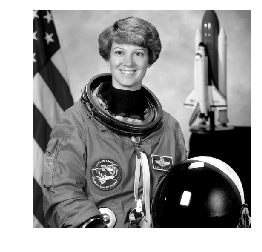

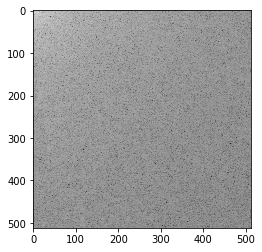

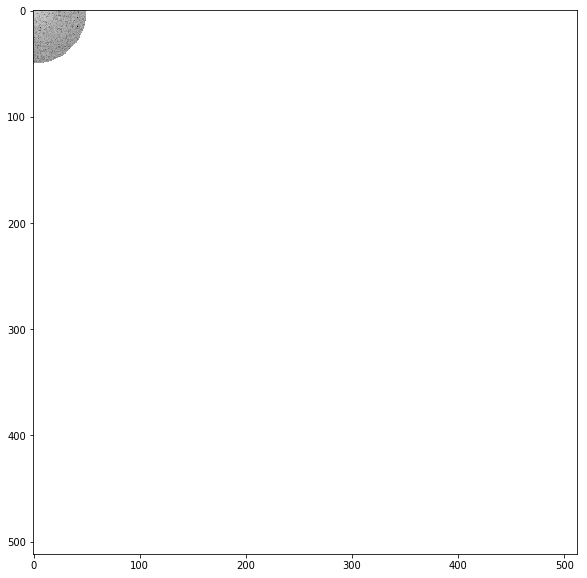

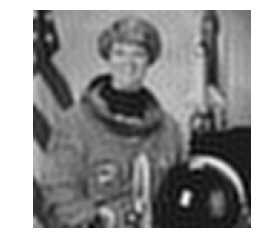

In [84]:
i=data.astronaut()
i=color.rgb2gray(i)

imshow(i,cmap=cm.gray)
_=axis('off')

I=dct(dct(i).T).T

figure()
imshow(log(abs(I)),cmap=cm.gray)

L=50

d=morphology.disk(L)
m=zeros(I.shape)
m[:L+1,:L+1]=d[L:,L:]

# m=1-m
I=I*m

figure(figsize=(10,10))
imshow(log(abs(I)),cmap=cm.gray)

i=idct(idct(I.T).T)

figure()
imshow(i,cmap=cm.gray)
_=axis('off')


# Splot w obrazie

Splot w obrazach 2D jest podobny do sygnałów akustycznych 1D. Metodę tą można s powodzeniem stosować do filtrowania obrazu i wszystkie inne reguły (np. dotyczące dziedziny częstotliwości) mają takie same odzwericiedlenie jak w sygnałach 1D.

Zacznijmy więc od najprostszego filtru: uśredniającego. Filtry do splotu 2D mają 2 wymiary (wysokość i szerokość). Zrób fitr uśredniający 10x10 i dokonaj splotu z wybranym obrazem (metoda *scipy.signal.convolve2d*).

Jaka jest charakterystyka tego filtru? Co on robi?

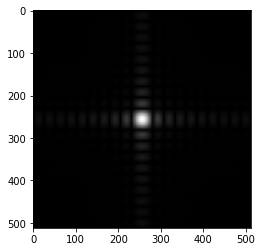

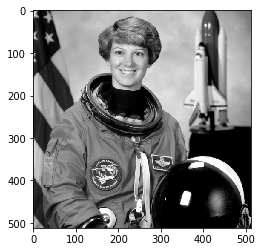

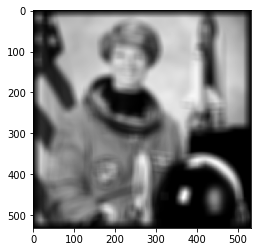

In [121]:
N=20
k=ones((N,N))
k/=k.sum()


l=zeros((512,512))
l[:k.shape[0],:k.shape[1]]=k
K=fft.fft2(l)
K=fft.fftshift(K)

imshow((abs(K)),cmap=cm.gray)

i=data.astronaut()
i=color.rgb2gray(i)

I=convolve2d(i,k)

figure()
imshow(i,cmap=cm.gray)
figure()
imshow(I,cmap=cm.gray)

Zamiast filtru uśredniającego, zastosuj filtr *Gaussowski*. Jaką on ma charakterystykę? Dlaczeo jest lepszy od uśredniającego?

Żeby zrobić Gaussowski filtr 2D, trzeba:
* zrobić filtr 1D o długości N
* zmienić go na macierz 2D (1xN)
* dokonać mnożenia tej macierzy przez jej transponowaną wersję

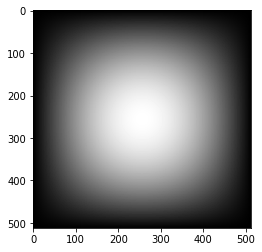

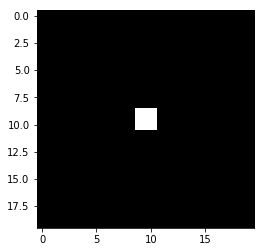

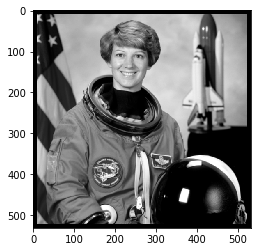

In [126]:
N=20
S=0.1
k=gaussian(N,S)
k=expand_dims(k,0)
k=k*k.T

l=zeros((512,512))
l[:k.shape[0],:k.shape[1]]=k
K=fft.fft2(l)
K=fft.fftshift(K)

imshow((abs(K)),cmap=cm.gray)

figure()
imshow(k,cmap=cm.gray)

k/=k.sum()

i=data.astronaut()
i=color.rgb2gray(i)

I=convolve2d(i,k)

# imshow(i,cmap=cm.gray)
figure()
imshow(I,cmap=cm.gray)

Zrób filtr używając następujących wartości:

| | | |
|-|-|-|
| -1 | -1 | -1 |
| -1 | 8 | -1 |
| -1 | -1 | -1 |

Co robi ten filtr?

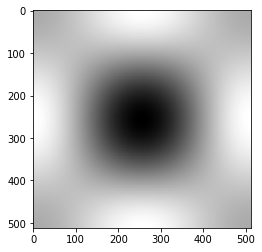

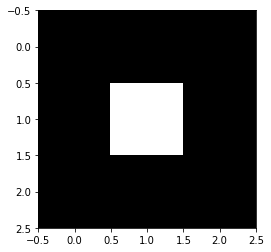

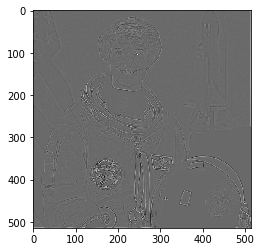

In [130]:
k=ones((3,3))*-1
k[1,1]=8

l=zeros((512,512))
l[:k.shape[0],:k.shape[1]]=k
K=fft.fft2(l)
K=fft.fftshift(K)

imshow((abs(K)),cmap=cm.gray)

figure()
imshow(k,cmap=cm.gray)

i=data.astronaut()
i=color.rgb2gray(i)

I=convolve2d(i,k)

# imshow(i,cmap=cm.gray)
figure()
imshow(I,cmap=cm.gray)

Łatwo można policzyć filtr który liczy pochodną z obrazu w poziomie albo pionie. Jak?

Zrób filtr Sobela-Feldmana zdefiniowanego w ten sposób:

| | | |
|-|-|-|
| -1 | -2 | -1 |
| 0 | 0 | 0 |
| 1 | 2 | 1 |

Oraz jego transponowaną wersję (odpowiadającą pochodnej według innej osi).

Narysuj obydwie pochodne obrazu, a potem ich moc i kąt używając tych samych wzorów jak w przypadku liczenia widma.

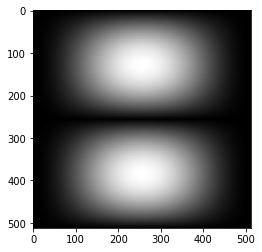

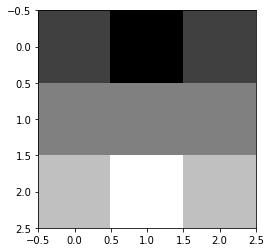

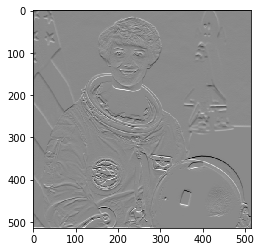

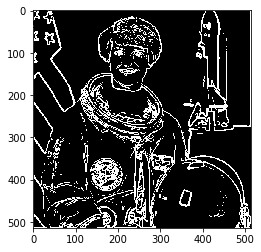

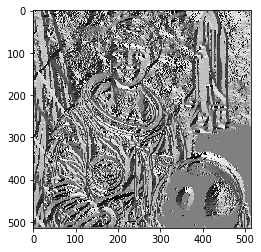

In [140]:
k=array([[-1,-2,-1],[0,0,0],[1,2,1]])

l=zeros((512,512))
l[:k.shape[0],:k.shape[1]]=k
K=fft.fft2(l)
K=fft.fftshift(K)

imshow((abs(K)),cmap=cm.gray)

figure()
imshow(k,cmap=cm.gray)

i=data.astronaut()
i=color.rgb2gray(i)

I=convolve2d(i,k)

# imshow(i,cmap=cm.gray)
figure()
imshow(I,cmap=cm.gray)

Ih=convolve2d(i,k)
Iv=convolve2d(i,k.T)
I=sqrt(Ih**2+Iv**2)

I=I>0.5

figure()
imshow(I,cmap=cm.gray)

Ia=arctan2(Iv,Ih)

figure()
imshow(Ia,cmap=cm.gray)

# Praca domowa

## 1. Filtrowanie w dziedzinie częstotliwości

Wczytaj obraz *noisecam.png*.

Jest to klatka ze szkolnego systemu monitoringu. Ze względu na oszczędności w instalacji użyto nieekranowanych kabli UTP do przesyłania zarówno sygnału jak i zasilania poszczególnych kamer (wskazówka!). Zrób filtrowanie w dziedzinie częstotliwości żeby usunąć szum na obrazie.

In [4]:
%ls

import os

AIR_1_4@                     Lab11_dz_cechy.ipynb          sawtooth.png
brickwall.jpg                Lab2_dz_sygnały.ipynb         square.png
dsc0085.jpg                  Lab3_dz_splot.ipynb           stego.bmp
dsc0085.jpg.1                Lab4_dz_Fourier.ipynb         step.png
img1.gif                     Lab5_dz_Probkowanie.ipynb     test
img.png                      Lab6_dz_DFT_FFT_STFT.ipynb    text.png
impulse.png                  Lab7_dz_Filtry_cyfrowe.ipynb  triangle.png
joker.bmp                    Lab8_dz_obrazy.ipynb          Wprowadzenie.ipynb
Lab10_dz_obrazy_trans.ipynb  Lab9_dz_punkt.ipynb           zdanie.wav@
Lab10_rozwiazane.ipynb       noisecam.png


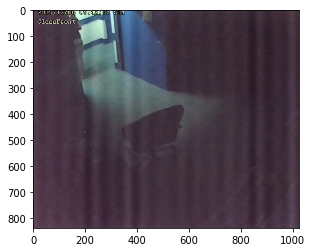

In [5]:
i = data.load(os.getcwd()+"/noisecam.png")
imshow(i, cmap=cm.gray)

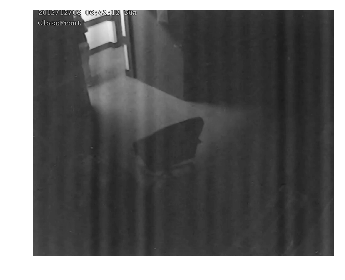

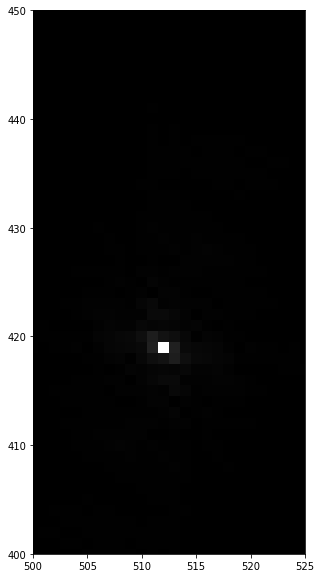

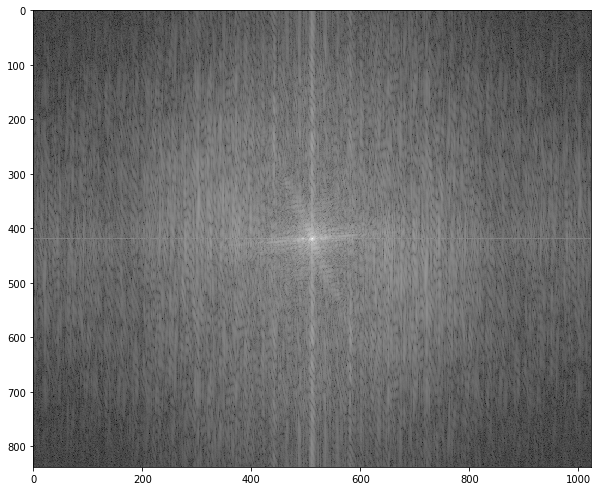

In [19]:
import os
from skimage import io
i=data.load(os.getcwd()+'/noisecam.png')

io.imshow(i)
i=color.rgb2gray(i)
imshow(i,cmap=cm.gray)
_=axis('off')

figure(figsize=(10,10))
H=fft.fft2(i)
H=fft.fftshift(H)
imshow(abs(H),cmap=cm.gray)

xlim(500,525)
ylim(400,450)

figure(figsize=(10,10))
imshow(log(abs(H)),cmap=cm.gray)

## 2. Wyrównanie tekstu

Ktoś źle zeskanował ten tekst i obraz *text.png* jest bardzo przechylony:

Użyj analizy częstotliwości obrazu żeby znaleźć kąt przechylenia obrazu. Jeśli chcesz, użyj metody *skimage.transform.rotate* żeby skorygować zdjęcie używając policzonych wartości.

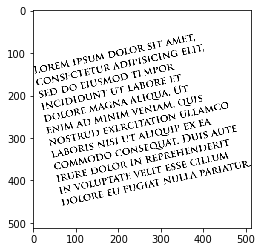

In [10]:
i = data.load(os.getcwd()+"/text.png")
imshow(i, cmap=cm.gray)

[[ 2218.          1129.13275026  3846.73524679 ...,  1186.48571432
   3846.73524679  1129.13275026]
 [ 1590.63950539  2741.86321728  1573.28373035 ...,  1732.3374441
   1783.58446917  2945.3680577 ]
 [ 1195.58008322  1217.69921378   436.69672417 ...,   446.00769319
   2208.69483408  2233.64946614]
 ..., 
 [ 2209.49370708  2315.11711005   710.36948148 ...,  1836.65552104
   2330.77398592  2632.85559413]
 [ 1195.58008322  2233.64946614  2208.69483408 ...,  1995.79393959
    436.69672417  1217.69921378]
 [ 1590.63950539  2945.3680577   1783.58446917 ...,  3247.38340573
   1573.28373035  2741.86321728]]


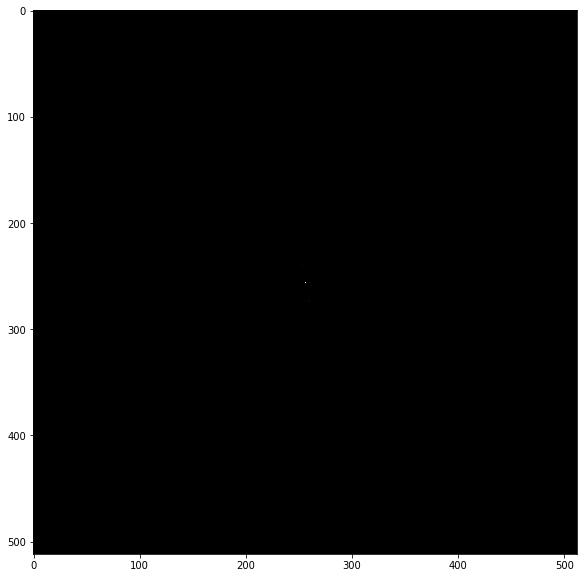

In [15]:
H=np.fft.fft2(i)
H=fft.fftshift(H)

figure(figsize=(10,10))
imshow(abs(H),cmap=cm.gray)
print(abs(H))

## 3. Analiza obrazu

Wczytaj obraz *brickwall.jpg*.

Użyj analizy częstotliwości żeby oszacować ilość cegieł na zdjęciu. Znajdź na widmie punkty odpowiadające wierszom i kolumnom na zdjęciu. Pokaż jak te punkty odpowiadają ilości cegieł. Pomnoż te wartości żeby podać szacunkową ilość cegieł.

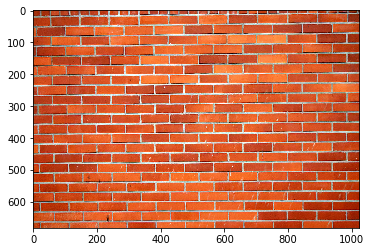

In [16]:
i = data.load(os.getcwd()+"/brickwall.jpg")
imshow(i, cmap=cm.gray)

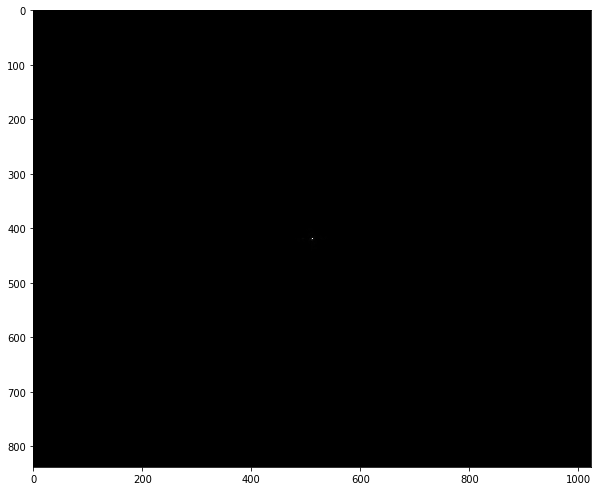

In [20]:
i=color.rgb2gray(i)
H=np.fft.fft2(i)
H=fft.fftshift(H)

figure(figsize=(10,10))
imshow(abs(H),cmap=cm.gray)
# print(abs(H))